<a href="https://colab.research.google.com/github/moliee/HealthcareAnlytics/blob/main/ExploratoryAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


**Import Python Libraries**

In [2]:
import pandas as pd
import numpy as mp
import scipy
from scipy.stats import ks_2samp
from statsmodels.distributions.empirical_distribution import ECDF

**Check if Folder/File Exists**

In [3]:
df1 = pd.read_csv("/content/gdrive/My Drive/ColabNotebooks/Datasets /insurance.csv", sep = ",")
#data = data.drop('region', axis=1)
#data = data.dropna(axis='columns')
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Import Seaborn library

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

Histograms for Categorical Variables: Region, Sex, Smoker

Text(0.5, 1.0, "Histogram for 'Region' Variable")

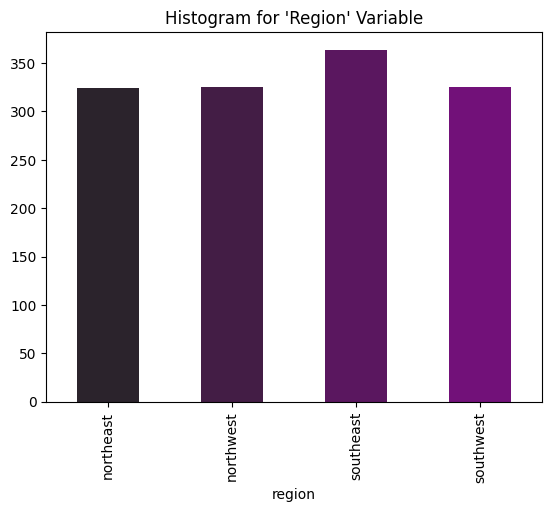

In [9]:
df1.groupby('region').size().plot(kind='bar',
                                  color = sns.dark_palette("#a205ac"))

axes1 = plt.gca()
axes1.set_title("Histogram for 'Region' Variable")


Text(0.5, 1.0, "Histogram for 'Sex' Variable")

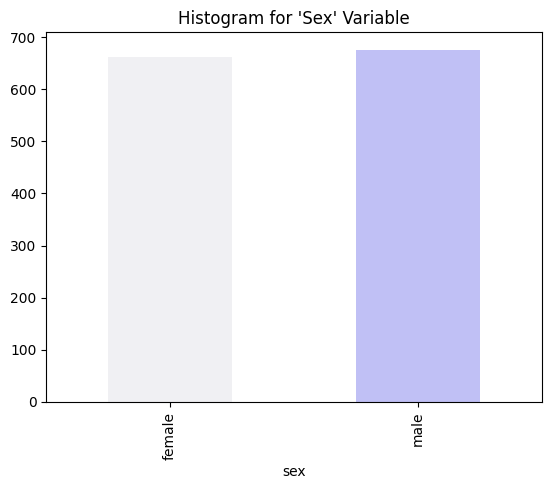

In [10]:
df1.groupby('sex').size().plot(kind='bar',
                                  color = sns.light_palette("blue"))
axes2 = plt.gca()
axes2.set_title("Histogram for 'Sex' Variable")

Text(0.5, 1.0, "Histogram for 'Smoker' Variable")

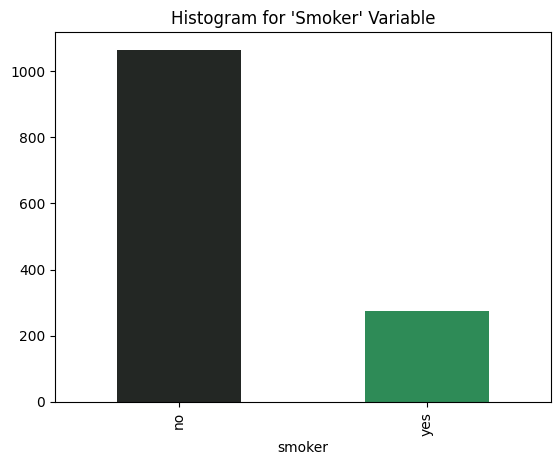

In [11]:
df1.groupby('smoker').size().plot(kind='bar',
                                  color = sns.dark_palette("seagreen", 2))
axes3 = plt.gca()
axes3.set_title("Histogram for 'Smoker' Variable")
#axes3.spines['top'].set_visible(False)
#axes3.spines['right'].set_visible(False)


Non-categorical variables = age, charges, bmi

               age       charges          bmi
count  1338.000000   1338.000000  1338.000000
mean     39.207025  13270.422265    30.663397
std      14.049960  12110.011237     6.098187
min      18.000000   1121.873900    15.960000
25%      27.000000   4740.287150    26.296250
50%      39.000000   9382.033000    30.400000
75%      51.000000  16639.912515    34.693750
max      64.000000  63770.428010    53.130000


Text(0, 0.5, 'Count')

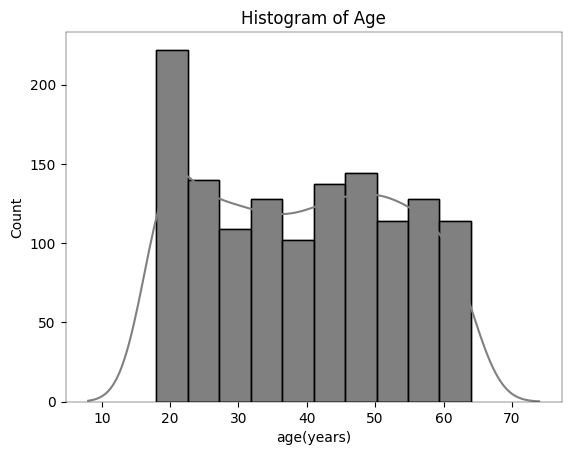

In [38]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

stats= df1[['age','charges','bmi']].describe()
print(stats)

# matplotlib histogram
plt.hist(df1["age"], color = 'grey', edgecolor = 'black')

# seaborn histogram
sns.histplot(df1["age"], kde=True, bins=10, color = 'grey',
           stat ="count", kde_kws=dict(cut=3))

#Add labels
plt.title('Histogram of Age')
plt.xlabel('age(years)')
plt.ylabel('Count')


In [113]:
#Check for datatypes
print(df1.describe())

#df1['age'] = pd.to_numeric(df1['age'], errors='coerce')  # Convert to numeric (handle errors)
#df1['bmi'] = pd.to_numeric(df1['bmi'], errors='coerce')  # Convert to numeric (handle errors)
#df1['charges'] = pd.to_numeric(df1['charges'], errors='coerce')  # Convert to numeric (handle errors)

#print(df1.dtypes)

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


Number of Outliers in age: 0
Number of Outliers in bmi: 9
Number of Outliers in charges: 139


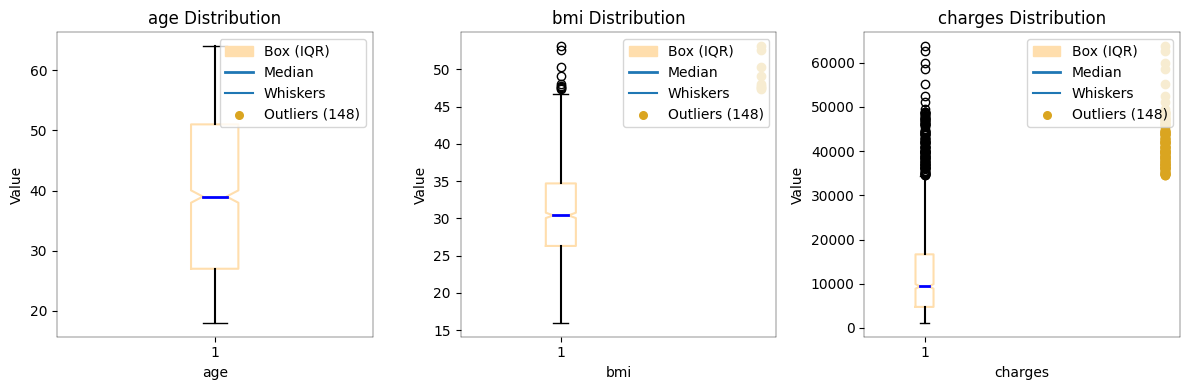

In [149]:
#Subplots
#matplotlib is imported already


from matplotlib.patches import Rectangle  # For legend elements

# Assuming your data is prepared in df1 with columns 'age', 'bmi', and 'charges'

# Define colors for different elements
box_color = 'navajowhite'
median_color = 'blue'
whisker_color = 'black'
outlier_color = 'goldenrod'

fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # Create 3 subplots

# Loop through columns and create boxplots
columns = ['age', 'bmi', 'charges']
outlier_counts = {}  # Dictionary to store outlier counts per column (optional)

for i, col in enumerate(columns):
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    iqr = q3 - q1
    median = df1[col].median()
    upper = min(q3 + 1.5 * iqr, df1[col].max())
    lower = max(q1 - 1.5 * iqr, df1[col].min())

    # Create box elements
    box = axes[i].boxplot(
        [df1[col]],
        notch=True,  # Notches added for better comparison
        vert=True,  # Vertical boxes
        patch_artist=False,  # Enable box element customization
        medianprops={"linewidth": 2, "color": median_color},
        boxprops={"linewidth": 1.5, "color": box_color},
        whiskerprops={"linewidth": 1.5, "color": whisker_color},
    )

    # Identify outliers (optional)
    outliers = df1.query(f"{col} < {lower} or {col} > {upper}")
    outlier_counts[col] = len(outliers)  # Store outlier count (optional)

    # Plot outliers if any
    if len(outliers) > 0:
        axes[i].scatter(
            [i + 1] * len(outliers), outliers[col], marker='o', color=outlier_color
        )

    # Add labels and title
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Value')
    axes[i].set_title(f"{col} Distribution")

# Legend elements
box_patch = Rectangle((0, 0), 1, 1, color=box_color, label='Box (IQR)')
median_line = plt.Line2D((0, 1), (median_color, median_color), linewidth=2, label='Median')
whisker_line = plt.Line2D((0, 1), (whisker_color, whisker_color), linewidth=1.5, label='Whiskers')
outlier_point = plt.scatter([], [], marker='o', s=30, color=outlier_color, label=f'Outliers ({sum(outlier_counts.values())})')
#outlier_count = plt.scatter(y= outliers[col], marker='o', color='red', label=f'Outliers ({outlier_counts[col]})'



# Create legend
legend_handles = [box_patch, median_line, whisker_line, outlier_point]
labels = [l.get_label() for l in legend_handles]
for i,ax in enumerate(axes):
  axes[i].legend(legend_handles, labels, loc='upper right')  # Add legend to each subplot



#legend_handles = [box_patch, median_line, whisker_line, outlier_point]
#labels = [l.get_label() for l in legend_handles]
#axes[i].legend(legend_handles, labels, loc='upper right')
#plt.legend(legend_handles, labels, loc='upper center', bbox_to_anchor=(1.2, 1))




plt.tight_layout()  # Adjust spacing between subplots

# Print outlier counts (optional)
if outlier_counts:
    for col, count in outlier_counts.items():
        print(f"Number of Outliers in {col}: {count}")

plt.show()


               age       charges          bmi
count  1338.000000   1338.000000  1338.000000
mean     39.207025  13270.422265    30.663397
std      14.049960  12110.011237     6.098187
min      18.000000   1121.873900    15.960000
25%      27.000000   4740.287150    26.296250
50%      39.000000   9382.033000    30.400000
75%      51.000000  16639.912515    34.693750
max      64.000000  63770.428010    53.130000


Text(0, 0.5, 'Count')

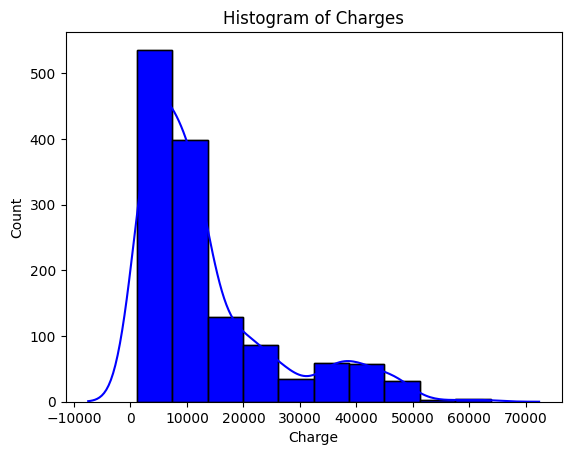

In [22]:
stats= df1[['age','charges','bmi']].describe()
print(stats)

# matplotlib histogram
plt.hist(df1["charges"], color = 'blue', edgecolor = 'black')


# seaborn histogram
sns.histplot(df1["charges"], kde=True, bins=0, color = 'blue',
             stat ="count", kde_kws=dict(cut=3))


# Add labels
plt.title('Histogram of Charges')
plt.xlabel('Charge')
plt.ylabel('Count')



               age       charges          bmi
count  1338.000000   1338.000000  1338.000000
mean     39.207025  13270.422265    30.663397
std      14.049960  12110.011237     6.098187
min      18.000000   1121.873900    15.960000
25%      27.000000   4740.287150    26.296250
50%      39.000000   9382.033000    30.400000
75%      51.000000  16639.912515    34.693750
max      64.000000  63770.428010    53.130000


Text(0, 0.5, 'Count')

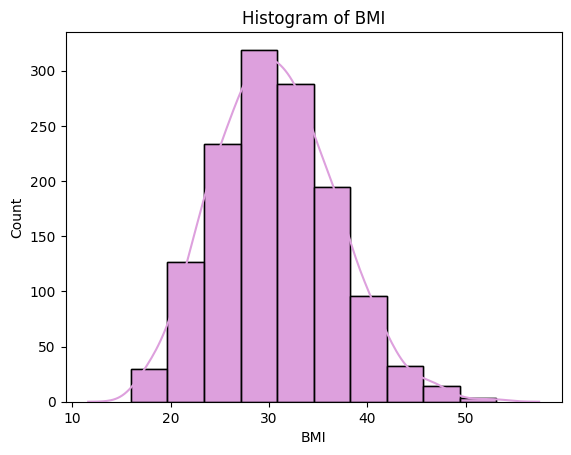

In [20]:
stats= df1[['age','charges','bmi']].describe()
print(stats)

# matplotlib histogram
plt.hist(df1["bmi"], color = 'plum', edgecolor = 'black')

# seaborn histogram
sns.histplot(df1["bmi"], kde=True, bins=10, color = 'plum',
             stat ="count", kde_kws=dict(cut=3))

# Add labels
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Count')